In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
df = pd.read_csv("wine.csv")

In [3]:
df.head(100)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
97,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.shape # number of rows and columns

(178, 14)

In [6]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

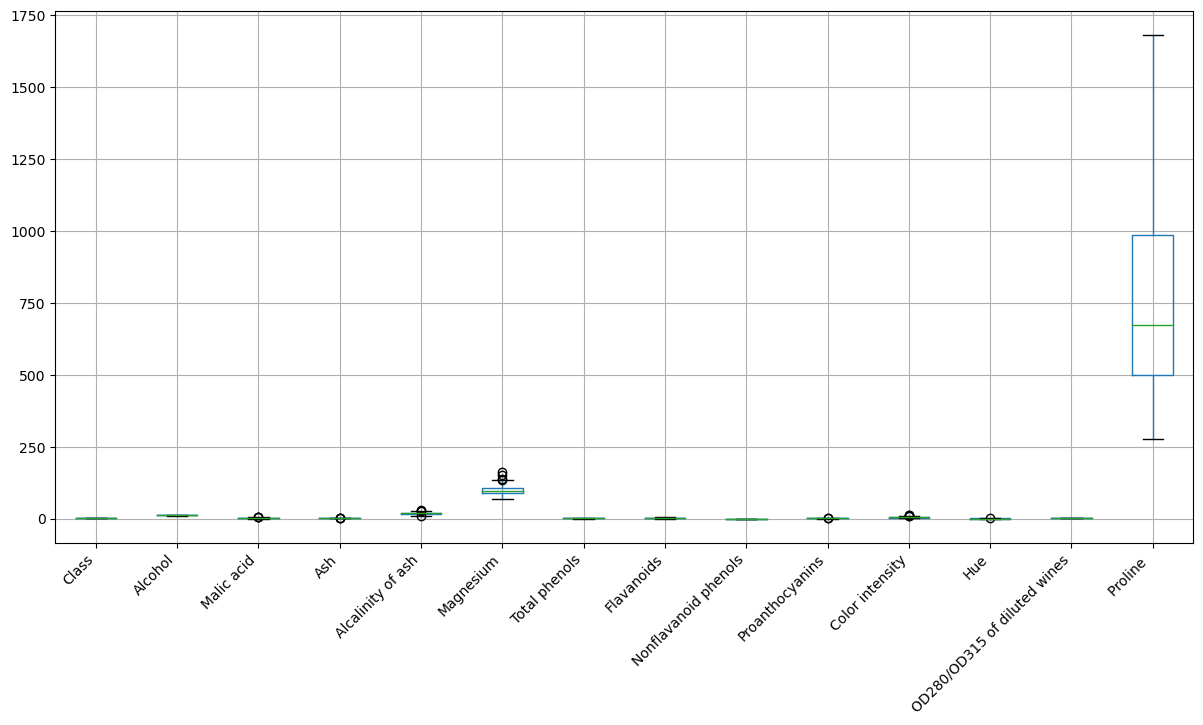

In [7]:
figure , axes = plt.subplots(figsize = (12,6))
figure.autofmt_xdate()
figure.tight_layout()
df.boxplot()
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


use the kdeplot() function from the Seaborn library to plot the distributions of the individual columns

In [8]:
df.columns.size

14

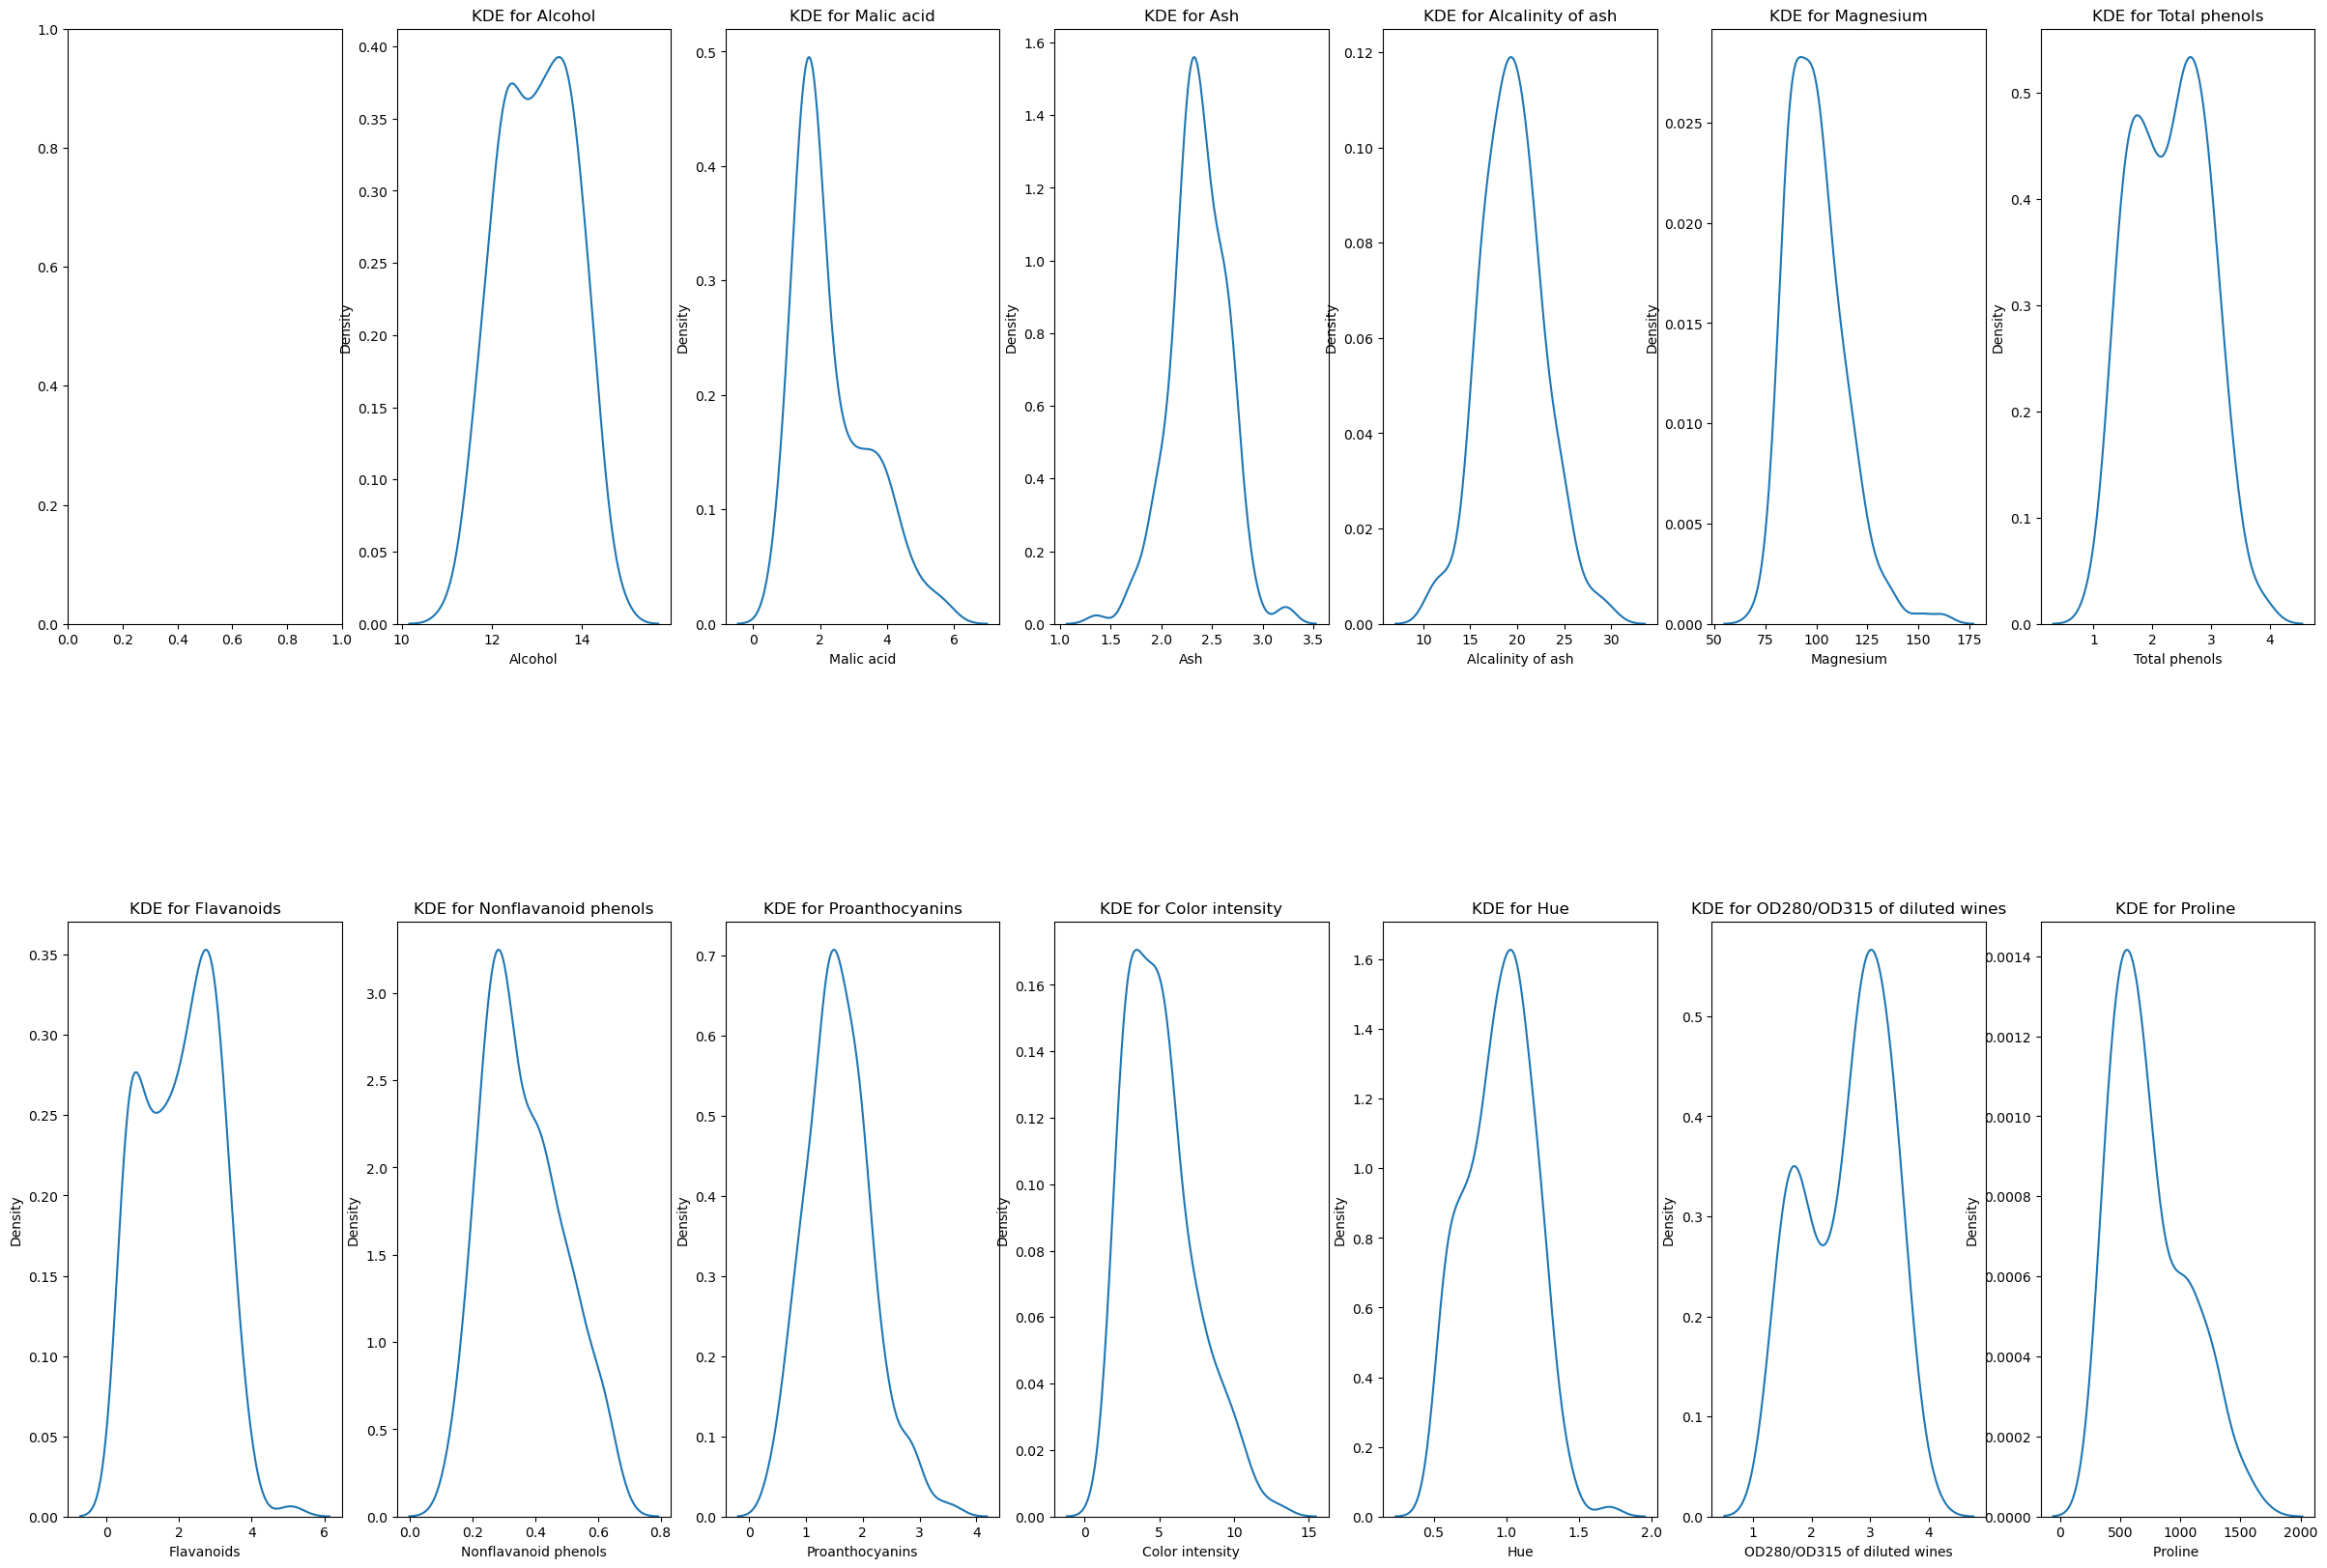

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the number of rows and columns for subplots
num_rows = 2  # 
num_cols = (len(df.columns) + 1) // 2  # Ensure you have enough subplots for all columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each column and plot KDE
for i ,column in enumerate(df.columns):
    if column!="Class":
        
        sns.kdeplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(f'KDE for {column}')
        axes[i].set_xlabel(column)

# If you have an odd number of columns, remove the last empty subplot
if len(df.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Display the plots
plt.show()

MODEL

In [10]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['Class'])
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print(f"shape of X_train is: {X_train.shape}")
print(f"shape of y_train is: {y_train.shape}")
print(f"shape of X_test is: {X_test.shape}")
print(f"shape of y_test is: {y_test.shape}")

shape of X_train is: (142, 13)
shape of y_train is: (142,)
shape of X_test is: (36, 13)
shape of y_test is: (36,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [13]:
model

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
}



In [15]:
grid_search = GridSearchCV(model, params, cv=10)

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 500, 1000]})

In [21]:
model_best = grid_search.best_estimator_

model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=42)

In [ ]:
# obtaining the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, model_best.predict(X_test)))

# MODEL EXPLANATION via LIME

In [98]:
import lime
from lime import lime_tabular

creating LimeTabularExplainer object and then we pass our training data in the form a NumPy array (essential syntactically), the feature names (using the columns attribute of a Pandas dataframe), class names, and since this is a classification problem, we set the mode to be 'classification'.

In [99]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns, 
            class_names=['1', '2', '3'] ,mode='classification')

Deriving the explanation of an instance using the lime_exp function on the previously instantiated lime_explainer

In [100]:
df.head(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [101]:
explanation = lime_explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=model_best.predict_proba, top_labels=6, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


    -the model predicts class 1 with 84% confidence, class 2 with 10% confidence, and class 3 with 7% confidence.
    

In [102]:
y_test.iloc[1]

1

The result contains three main pieces of information : 

    (1) the model’s predictions
    (2) features contributions
    (3) the actual value for each feature.

the threshold for the attribute 'proline' is 932.75, above which increases the chance of it being in class 2 or 3 with weightages 0.14 and 0.02 respectively, whereas below it increases the chance of it being in class 3 with weightage 0.17. Here, the value of proline is 1080.00, thus, increasing its probability of being in class 1

#  MODEL EXPLANATION via SHAP

SHapley Additive exPlanations (SHAP) - helps us interpret the contribution of each attribute on the prediction in a detailed manner.


In [22]:
import numpy as np
import scipy

## Setting up SHAP Explainer

In [23]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


`note` TreeExplainer because our model is tree like arcitecture

In [66]:
tree_explainer = shap.TreeExplainer(model_best)
tree_shap_values = tree_explainer.shap_values(x)
shap.initjs() #initialize javascript in cell

By calling  `shap.Explainer(model_best)` , you are creating an explainer object that will be used to explain the predictions made by model_best.

shap_values, will contain the calculated SHAP values, where each SHAP value corresponds to an instance in your input data X , HAP values aim to explain why a particular prediction was made by a machine learning model for a specific input instance.

In [67]:
np.shape(shap_values) # it is clear that it is a matrix 

(3, 178, 13)

(178, 13, 3) shape indicates that you have SHAP values calculated for 178 instances, 13 features, and 3 classes, which is consistent with a multi-class classification problem.

### Summary plot
The summary plot is like a chart that shows you which features are the most important and how they affect the prediction.

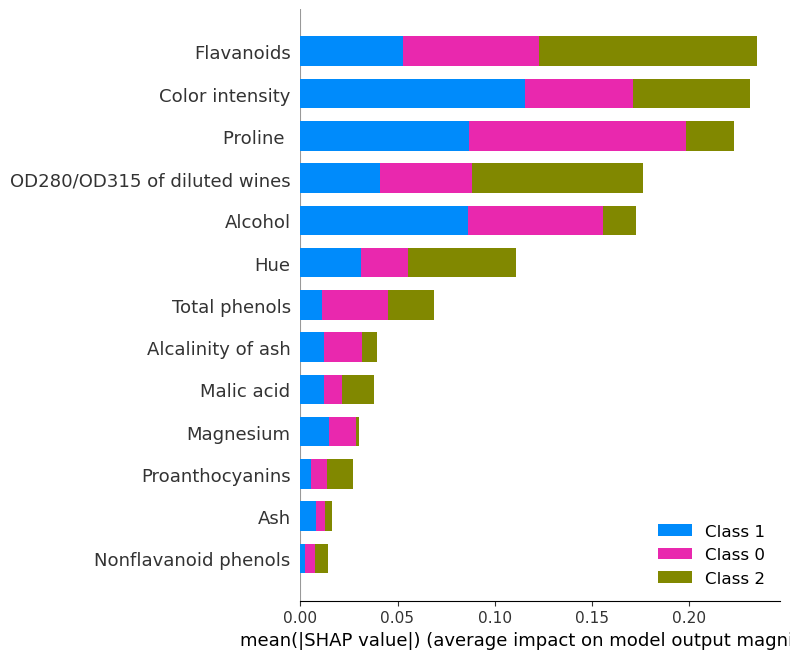

In [68]:
shap.summary_plot(shap_values, x.values, plot_type="bar", feature_names = x.columns)


### we can also see the summary_plot of a specific class.

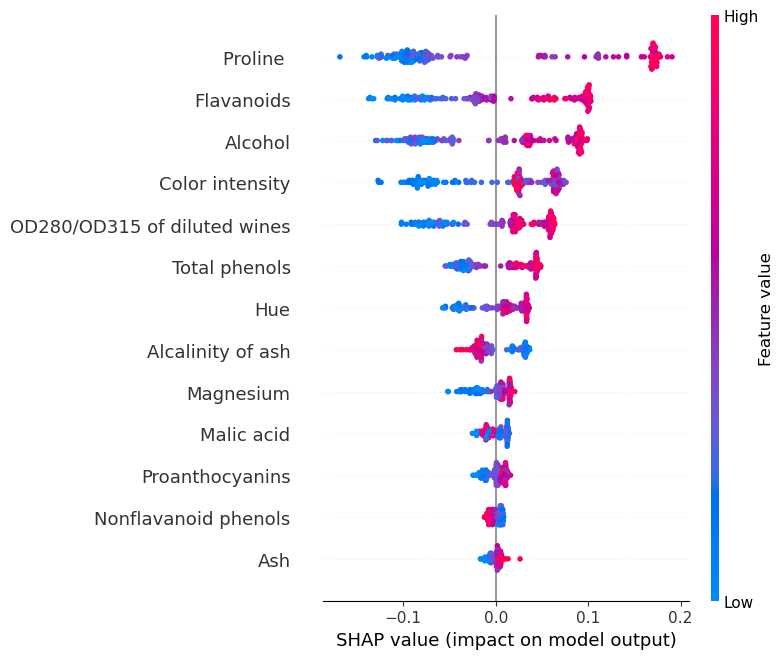

In [76]:
shap.summary_plot(shap_values[0], x.values, feature_names = x.columns)

The summary plot combines `feature importance` with `feature effects`. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value

You can see that the feature Ash, being the least important feature, has low Shapley values. The color represents the value of the feature from low to high.

    -Each point on this chart represents one feature and one instance
    -The position on the left-to-right line (x-axis) shows how much that feature influenced the prediction.
    -The position of the point on the up-and-down line (y-axis) shows how much that feature matters. If it's high up, it's important; if it's low down, not so important.
    
**The summary plot gives us a first look at which features are important and how they impact predictions in general.
If we want to understand the exact way a feature affects predictions, we need to look at something called "SHAP dependence plots." These give us more detailed information about how each feature works.**

## dependence plot

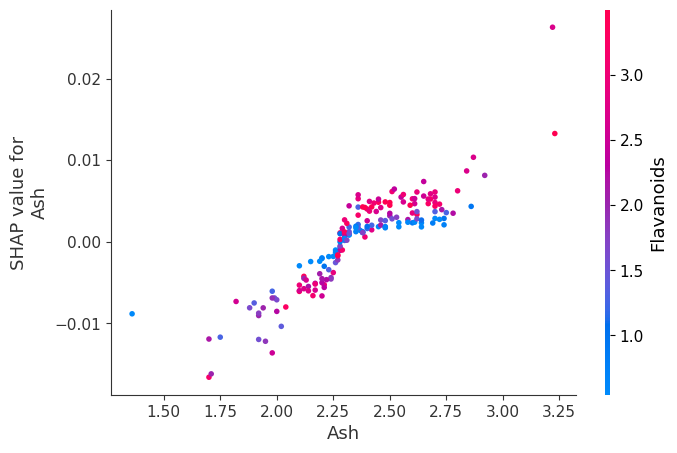

In [88]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(2, shap_values[0], x.values, feature_names=x.columns) # 2 is the index of the feature to plot


    -we can see a clear vertical pattern of coloring for the interaction between the features,interaction between the features Ash and Flavanoids
    -The SHAP Dependence Plot helps us understand how individual features affect the predictions made by a machine learning model
    -The x-axis is the actual value from the dataset.
    -The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.
    
    -The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.



## SHAP Force plot

In [91]:
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], x.values[i], feature_names = x.columns)

**Force plot gives us the explainability of a single model prediction. In this plot, we can see how features contributed to the model’s prediction for a specific observation**

**From the plot we can see:**

    1. The model predict_proba value: 0.94
    The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). In this example base value = 0.3133

    2. The numbers on the plot arrows are the value of the feature for this instance. Alcohol = 14.83 and proline = 1,045
    3. Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
    4. The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis.
    
    5. Proline of 1045 increases the property that the class is, 1

## SHAP waterfall plot

**The waterfall plot is another local analysis plot of a single instance prediction. Let’s take instance number 11 as an example:**

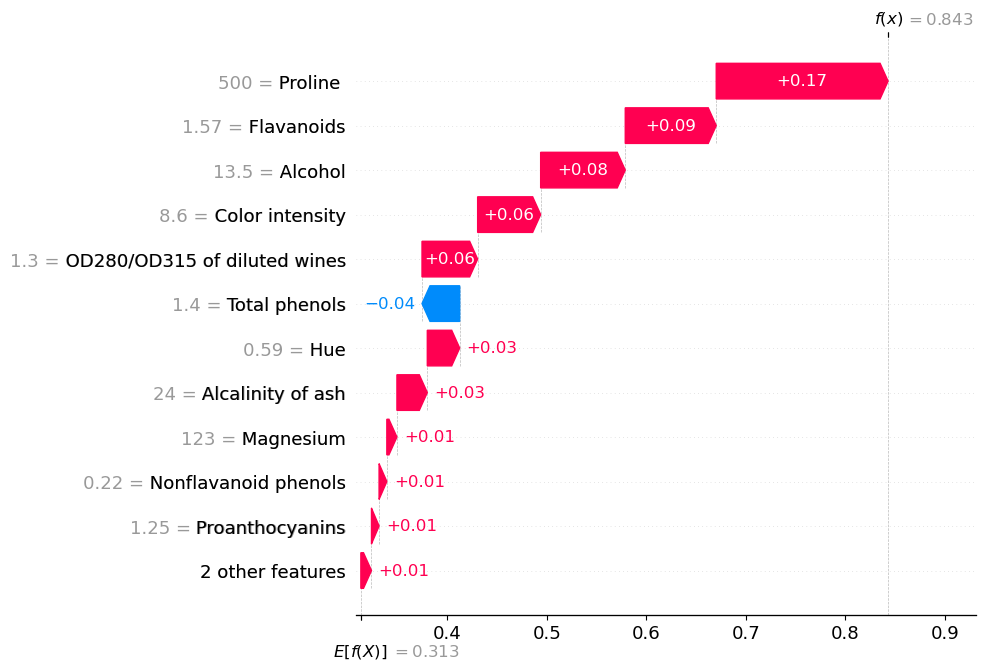

In [112]:
row = 11
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()) , max_display = 12)

    -f(x) is the model predict_proba value: 0.843.
    
    -E[f(x)] is the base value = 0.313
    
    -On the left are the `features value` and on the arrows the `feature contribution` to the prediction.
    
    -Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction

## decision_plot

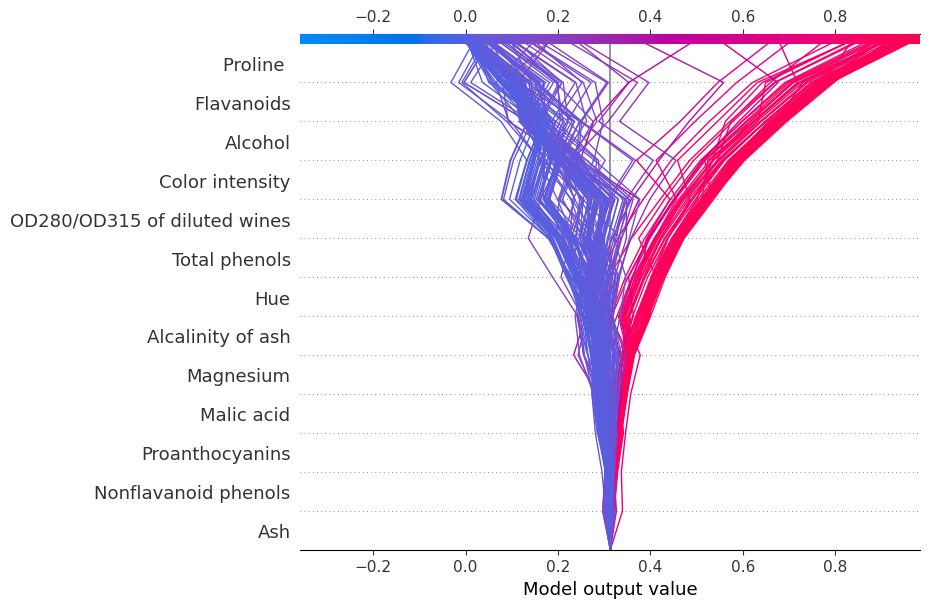

In [116]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(X_train.columns))


The Decision Plot shows essentially the same information as the Force Plot. The grey vertical line is the base value and the red line indicates if each feature moved the output value to a higher or lower value than the average prediction. This plot can be a little bit more clear and intuitive than the previous one, especially when there are many features to analyze. In the Force Plot the information may look very condensed when the number of predictors is high.